In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from IPython.display import display

In [29]:
# Define colors
GRAY = ['#231F20', '#393536', '#4f4c4d', '#656263', '#7b7979', '#918f90', '#a7a5a6', '#bdbcbc', '#d3d2d2', '#e9e9e9']
BLUE = ['#174b7e','#2e5d8b', '#456f98', '#5d81a5', '#7493b2', '#8ba5bf', '#a2b7cb', '#b9c9d8', '#d1dbe5', '#e8edf2']
RED = ['#C3514E', '#E6BAB7']
GREEN = ['#0C8040', '#9ABB59']
ORANGE = ['#F79747']

# Configure plot font family to Arial
plt.rcParams['font.family'] = 'Arial'

#sns.palplot(sns.color_palette(GRAY))
#sns.palplot(sns.color_palette(BLUE))
#sns.palplot(sns.color_palette(RED))
#sns.palplot(sns.color_palette(ORANGE))
#sns.palplot(sns.color_palette(GREEN))

In [30]:
# Read in dataset
data = pd.read_csv('../datasets/co2_emissions_kt_by_country.csv')

display(data)

,country_code,country_name,year,value
0,ABW,Aruba,1960,11092.675000
1,ABW,Aruba,1961,11576.719000
2,ABW,Aruba,1962,12713.489000
3,ABW,Aruba,1963,12178.107000
4,ABW,Aruba,1964,11840.743000
...,...,...,...,...
13948,ZWE,Zimbabwe,2015,12430.000305
13949,ZWE,Zimbabwe,2016,11020.000458
13950,ZWE,Zimbabwe,2017,10340.000153
13951,ZWE,Zimbabwe,2018,12380.000114


In [31]:
emissions = data[data.country_name.isin(["Germany", "France", "Italy", "Spain", "Poland", "United Kingdom"])]
emissions_of_1990 = emissions[emissions.year == 1990]
emissions_of_2019 = emissions[emissions.year == 2019]

display(emissions_of_1990)
display(emissions_of_2019)

,country_code,country_name,year,value
2912,DEU,Germany,1990,955310.0
3752,ESP,Spain,1990,214950.0
4142,FRA,France,1990,356240.0
4349,GBR,United Kingdom,1990,561770.0
6200,ITA,Italy,1990,405260.0
10100,POL,Poland,1990,350210.0


,country_code,country_name,year,value
2941,DEU,Germany,2019,657400.024414
3781,ESP,Spain,2019,239979.995728
4171,FRA,France,2019,300519.989014
4378,GBR,United Kingdom,2019,348920.013428
6229,ITA,Italy,2019,317239.990234
10129,POL,Poland,2019,295130.004883


# Horizontal bar chart

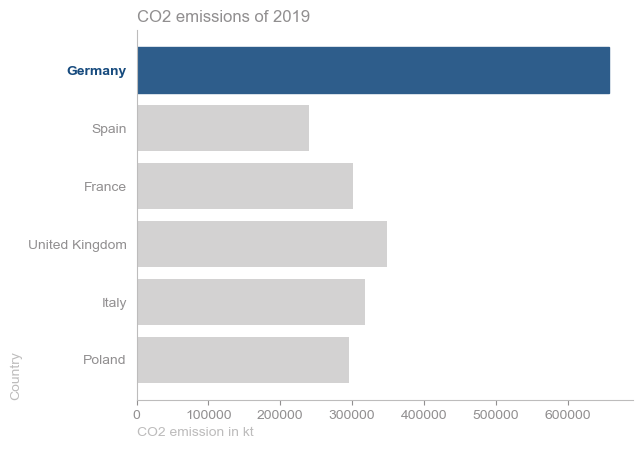

In [63]:
ax = plt.subplot()
bar = ax.barh(emissions_of_2019.country_name[::-1], emissions_of_2019.value[::-1], color=GRAY[8])

ax.set_title("CO2 emissions of 2019", loc="left", color=GRAY[5])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(GRAY[7])
ax.spines['left'].set_color(GRAY[7])

ax.tick_params(axis='x', colors=GRAY[5], which='both')
ax.tick_params(axis='y', colors=GRAY[5], which='both', left=False)

ax.set_xlabel('CO2 emission in kt', loc='left', color=GRAY[7])
ax.set_ylabel('Country', loc='bottom', color=GRAY[7])

bar[-1].set_color(BLUE[1])
ax.get_yticklabels()[-1].set_color(BLUE[0])
ax.get_yticklabels()[-1].set_fontweight('bold')

plt.show()

# Horizontal bar chart with multiple series

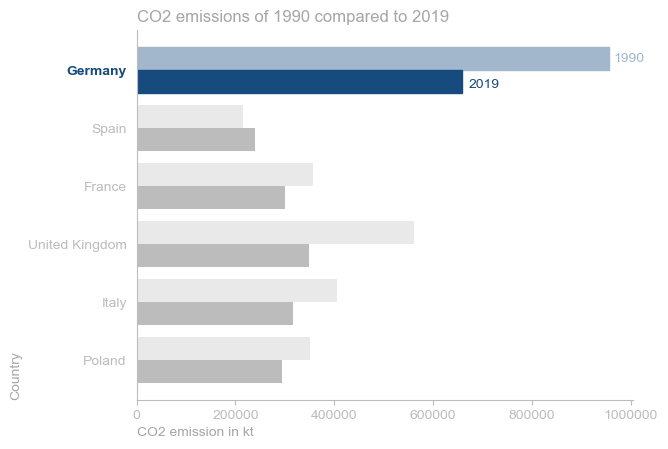

In [95]:
ax = plt.subplot()

y_axis = np.arange(len(emissions_of_1990))
bar_1990 = ax.barh(y_axis + 0.2, emissions_of_1990.value[::-1], color=GRAY[9], height=0.4)
bar_2019 = ax.barh(y_axis - 0.2, emissions_of_2019.value[::-1], color=GRAY[7], height=0.4)

plt.yticks(y_axis, emissions_of_1990.country_name[::-1])

ax.set_title("CO2 emissions of 1990 compared to 2019", loc="left", color=GRAY[6])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_color(GRAY[7])
ax.spines['left'].set_color(GRAY[7])

ax.tick_params(axis='x', colors=GRAY[7], which='both')
ax.tick_params(axis='y', colors=GRAY[7], which='both', left=False)

ax.set_xlabel('CO2 emission in kt', loc='left', color=GRAY[6])
ax.set_ylabel('Country', loc='bottom', color=GRAY[6])

ax.ticklabel_format(useOffset=False, style='plain', axis='x')

bar_1990[-1].set_color(BLUE[6])
bar_2019[-1].set_color(BLUE[0])
ax.get_yticklabels()[-1].set_color(BLUE[0])
ax.get_yticklabels()[-1].set_fontweight('bold')
ax.annotate("1990", xy=(emissions_of_1990.value.iloc[0] * 1.01, y_axis[-1] * 1.03), xycoords="data", color=BLUE[6])
ax.annotate("2019", xy=(emissions_of_2019.value.iloc[0] * 1.02, (y_axis[-1] - 0.2) * 0.98), xycoords="data", color=BLUE[0])

plt.show()